### Import Libraries

In [705]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [706]:
import sys, pandas, numpy, seaborn, matplotlib, sklearn, imblearn
print(f"Python: {sys.version.split(' ')[0]}")
print(pandas.__version__)
print(numpy.__version__)
print(seaborn.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)
print(imblearn.__version__)

Python: 3.12.5
2.2.2
2.1.0
0.13.2
3.9.2
1.6.1
0.14.0


### Read and Load dataset

In [707]:
df = pd.read_csv("survey lung cancer.csv")
df.columns = ['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Chronic_Disease', 'Fatigue', 'Allergy', 'Wheezing', 'Alcohol_Consuming', 'Coughing', 'Shortness_of_Breath', 'Swallowing_Difficulty', 'Chest_Pain', 'Lung_Cancer']
df

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic_Disease,Fatigue,Allergy,Wheezing,Alcohol_Consuming,Coughing,Shortness_of_Breath,Swallowing_Difficulty,Chest_Pain,Lung_Cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


### Exploratory Data Analysis

In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 309 non-null    object
 1   Age                    309 non-null    int64 
 2   Smoking                309 non-null    int64 
 3   Yellow_Fingers         309 non-null    int64 
 4   Anxiety                309 non-null    int64 
 5   Peer_Pressure          309 non-null    int64 
 6   Chronic_Disease        309 non-null    int64 
 7   Fatigue                309 non-null    int64 
 8   Allergy                309 non-null    int64 
 9   Wheezing               309 non-null    int64 
 10  Alcohol_Consuming      309 non-null    int64 
 11  Coughing               309 non-null    int64 
 12  Shortness_of_Breath    309 non-null    int64 
 13  Swallowing_Difficulty  309 non-null    int64 
 14  Chest_Pain             309 non-null    int64 
 15  Lung_Cancer            

In [709]:
df.describe()

,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic_Disease,Fatigue,Allergy,Wheezing,Alcohol_Consuming,Coughing,Shortness_of_Breath,Swallowing_Difficulty,Chest_Pain
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [710]:
df.head(5)

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic_Disease,Fatigue,Allergy,Wheezing,Alcohol_Consuming,Coughing,Shortness_of_Breath,Swallowing_Difficulty,Chest_Pain,Lung_Cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [711]:
df.tail(5)

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic_Disease,Fatigue,Allergy,Wheezing,Alcohol_Consuming,Coughing,Shortness_of_Breath,Swallowing_Difficulty,Chest_Pain,Lung_Cancer
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [712]:
df.shape

(309, 16)

In [713]:
df[df['Lung_Cancer'] == 'YES'].count()

Gender                   270
Age                      270
Smoking                  270
Yellow_Fingers           270
Anxiety                  270
Peer_Pressure            270
Chronic_Disease          270
Fatigue                  270
Allergy                  270
Wheezing                 270
Alcohol_Consuming        270
Coughing                 270
Shortness_of_Breath      270
Swallowing_Difficulty    270
Chest_Pain               270
Lung_Cancer              270
dtype: int64

In [714]:
# Check Missing Values
df.isnull().sum()

Gender                   0
Age                      0
Smoking                  0
Yellow_Fingers           0
Anxiety                  0
Peer_Pressure            0
Chronic_Disease          0
Fatigue                  0
Allergy                  0
Wheezing                 0
Alcohol_Consuming        0
Coughing                 0
Shortness_of_Breath      0
Swallowing_Difficulty    0
Chest_Pain               0
Lung_Cancer              0
dtype: int64

In [715]:
# Check Duplicated data
df.duplicated().value_counts()

False    276
True      33
Name: count, dtype: int64

In [716]:
# Remove Duplicated data
df.drop_duplicates(inplace=True)

In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 276 non-null    object
 1   Age                    276 non-null    int64 
 2   Smoking                276 non-null    int64 
 3   Yellow_Fingers         276 non-null    int64 
 4   Anxiety                276 non-null    int64 
 5   Peer_Pressure          276 non-null    int64 
 6   Chronic_Disease        276 non-null    int64 
 7   Fatigue                276 non-null    int64 
 8   Allergy                276 non-null    int64 
 9   Wheezing               276 non-null    int64 
 10  Alcohol_Consuming      276 non-null    int64 
 11  Coughing               276 non-null    int64 
 12  Shortness_of_Breath    276 non-null    int64 
 13  Swallowing_Difficulty  276 non-null    int64 
 14  Chest_Pain             276 non-null    int64 
 15  Lung_Cancer            276 n

In [718]:
df.shape

(276, 16)

In [719]:
df.describe()

,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic_Disease,Fatigue,Allergy,Wheezing,Alcohol_Consuming,Coughing,Shortness_of_Breath,Swallowing_Difficulty,Chest_Pain
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [720]:
df[df['Lung_Cancer'] == 'NO'].count()

Gender                   38
Age                      38
Smoking                  38
Yellow_Fingers           38
Anxiety                  38
Peer_Pressure            38
Chronic_Disease          38
Fatigue                  38
Allergy                  38
Wheezing                 38
Alcohol_Consuming        38
Coughing                 38
Shortness_of_Breath      38
Swallowing_Difficulty    38
Chest_Pain               38
Lung_Cancer              38
dtype: int64

### Check the Distribution 

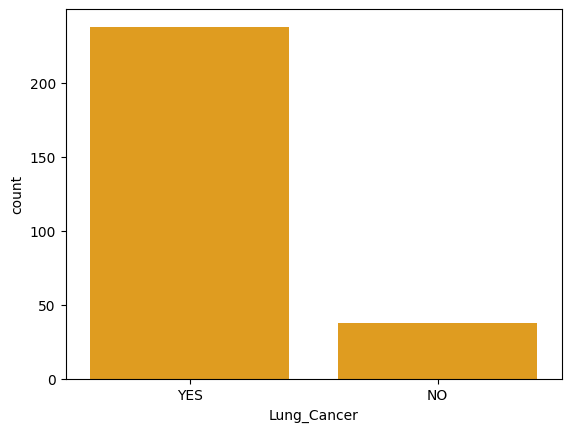

In [721]:
sns.countplot(x='Lung_Cancer', data=df, color='orange')
plt.show()

In [722]:
df['Lung_Cancer'].value_counts()

Lung_Cancer
YES    238
NO      38
Name: count, dtype: int64

In [723]:
# Check the distribution between independent variables and target variable
def plot(col, df=df):
  return df.groupby(col)['Lung_Cancer'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='Gender'>

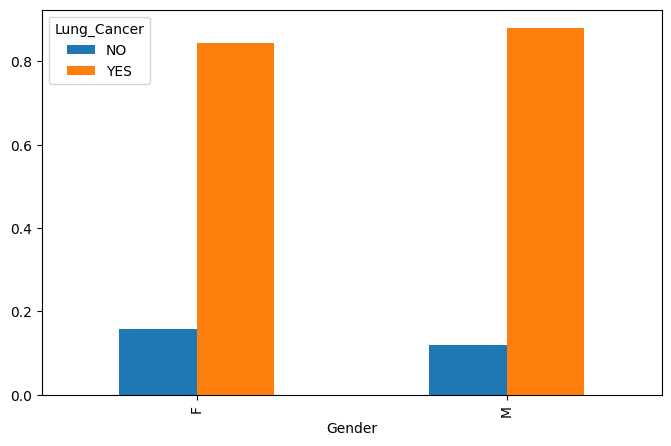

In [724]:
plot('Gender')

<Axes: xlabel='Age'>

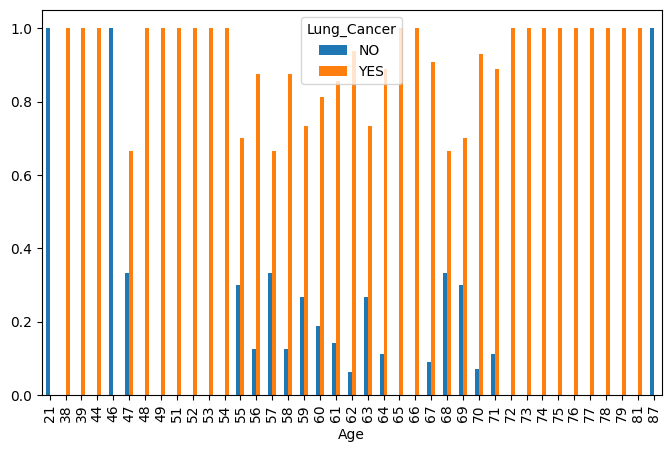

In [725]:
plot('Age')

<Axes: xlabel='Smoking'>

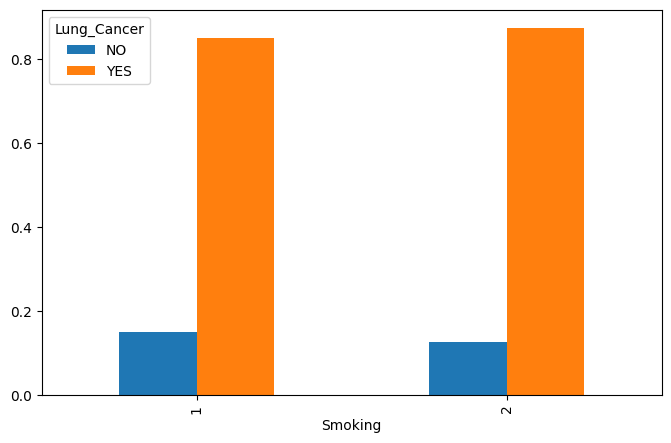

In [726]:
plot('Smoking')

<Axes: xlabel='Yellow_Fingers'>

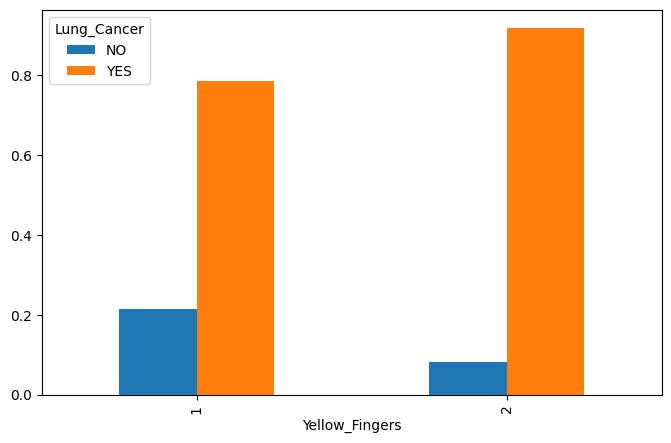

In [727]:
plot('Yellow_Fingers')

<Axes: xlabel='Anxiety'>

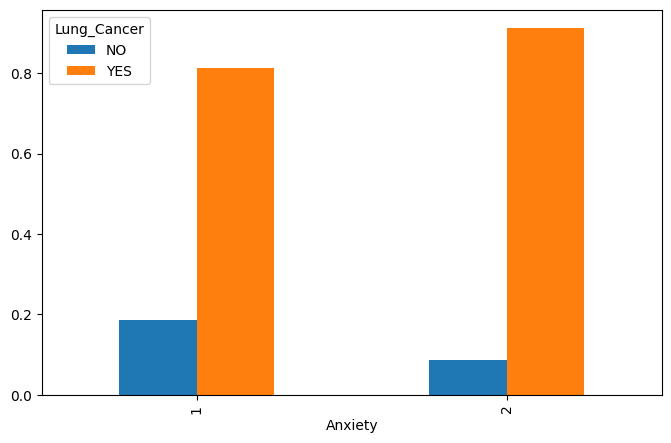

In [728]:
plot('Anxiety')

<Axes: xlabel='Peer_Pressure'>

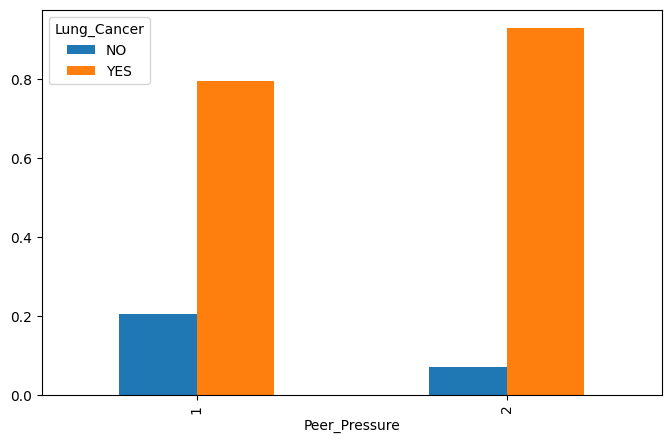

In [729]:
plot('Peer_Pressure')

<Axes: xlabel='Chronic_Disease'>

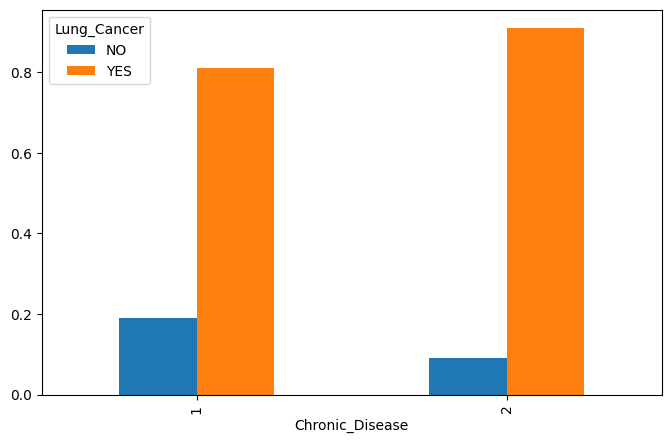

In [730]:
plot('Chronic_Disease')

<Axes: xlabel='Fatigue'>

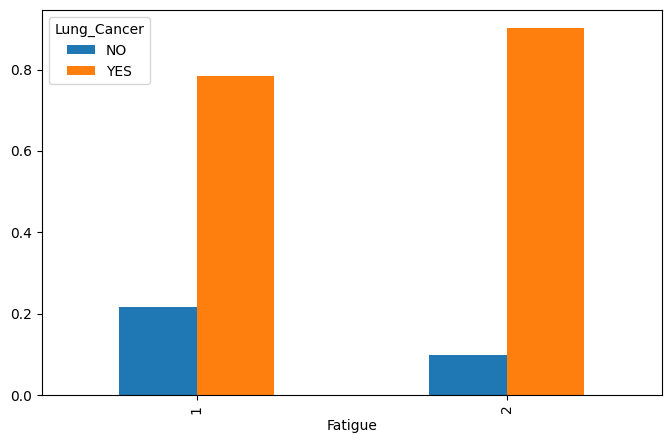

In [731]:
plot('Fatigue')

<Axes: xlabel='Allergy'>

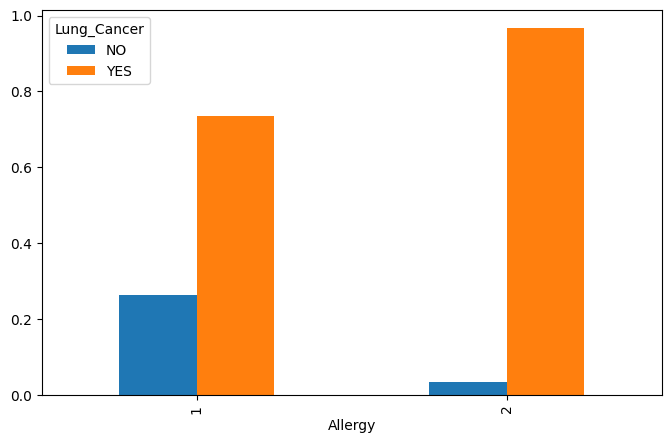

In [732]:
plot('Allergy')

<Axes: xlabel='Wheezing'>

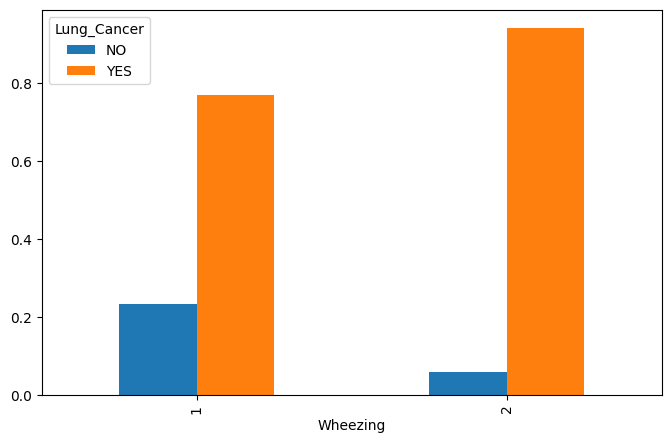

In [733]:
plot('Wheezing')

<Axes: xlabel='Alcohol_Consuming'>

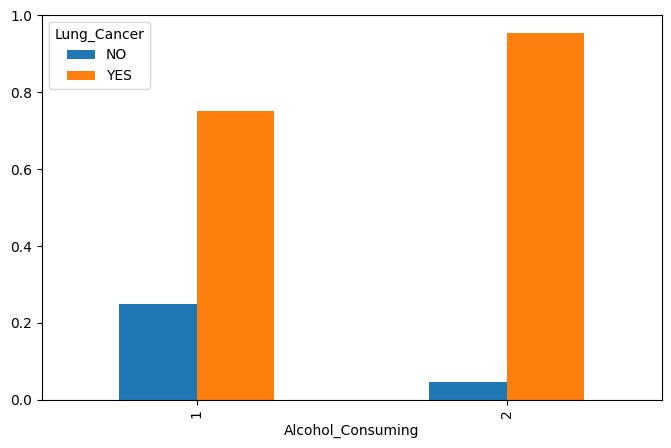

In [734]:
plot('Alcohol_Consuming')

<Axes: xlabel='Coughing'>

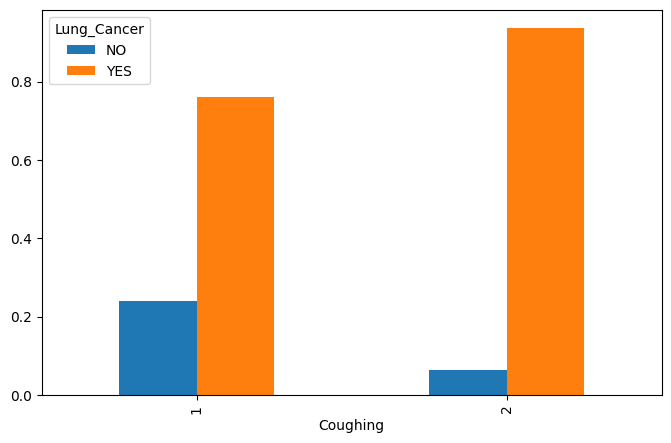

In [735]:
plot('Coughing')

<Axes: xlabel='Shortness_of_Breath'>

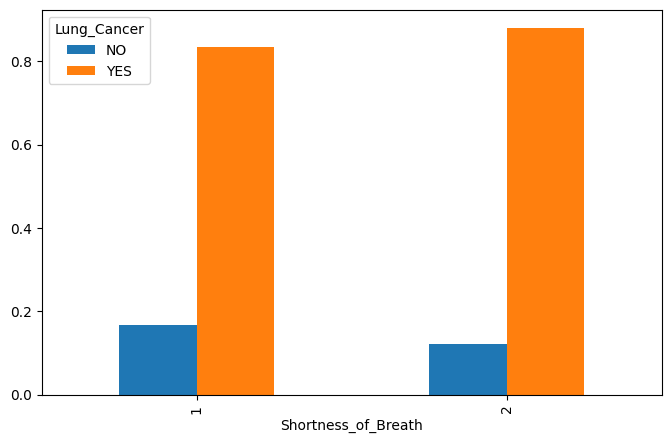

In [736]:
plot('Shortness_of_Breath')

<Axes: xlabel='Swallowing_Difficulty'>

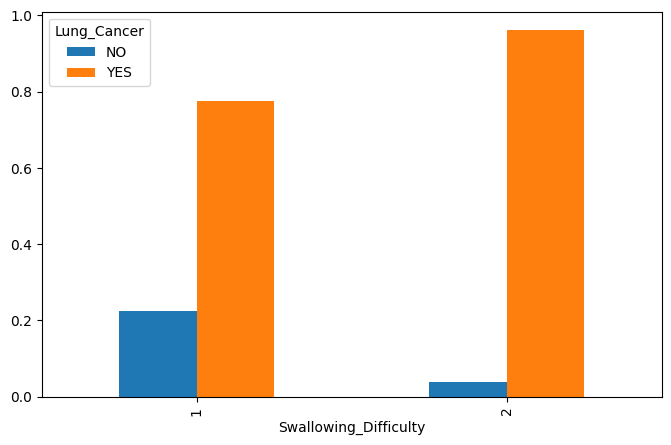

In [737]:
plot('Swallowing_Difficulty')

<Axes: xlabel='Chest_Pain'>

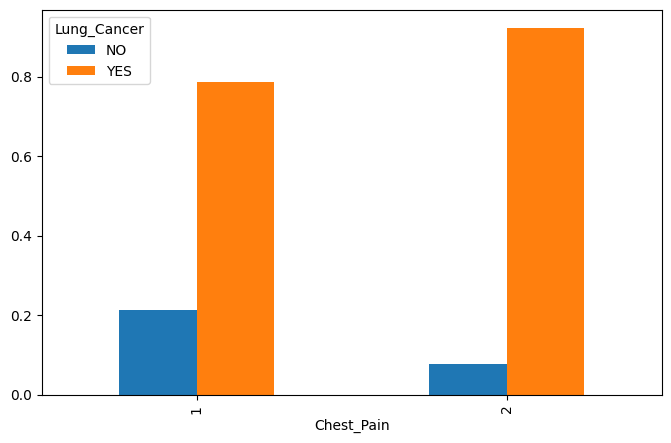

In [738]:
plot('Chest_Pain')

### Find Correlation

In [739]:
corr

,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic_Disease,Fatigue,Allergy,Wheezing,Alcohol_Consuming,Coughing,Swallowing_Difficulty,Chest_Pain,Lung_Cancer
Yellow_Fingers,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169,0.189192
Anxiety,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182,0.144322
Peer_Pressure,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,0.327764,-0.074655,0.195086
Chronic_Disease,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895,0.143692
Fatigue,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757,0.160078
Allergy,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440,0.333552
Wheezing,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846,0.249054
Alcohol_Consuming,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767,0.294422
Coughing,0.020803,-0.218843,-0.068224,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988,0.253027
Swallowing_Difficulty,0.333349,0.478820,0.327764,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674,0.268940


In [740]:
df1 = df.drop(columns=['Gender', 'Age', 'Smoking', 'Shortness_of_Breath'], axis=1)
df1

,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic_Disease,Fatigue,Allergy,Wheezing,Alcohol_Consuming,Coughing,Swallowing_Difficulty,Chest_Pain,Lung_Cancer
0,2,2,1,1,2,1,2,2,2,2,2,YES
1,1,1,1,2,2,2,1,1,1,2,2,YES
2,1,1,2,1,2,1,2,1,2,1,2,NO
3,2,2,1,1,1,1,1,2,1,2,2,NO
4,2,1,1,1,1,1,2,1,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
279,2,2,2,1,1,2,2,1,2,2,1,YES
280,1,1,1,2,2,2,1,1,1,1,1,NO
281,1,1,1,1,2,2,1,1,1,1,2,NO
282,2,2,1,1,1,1,1,1,1,2,2,NO


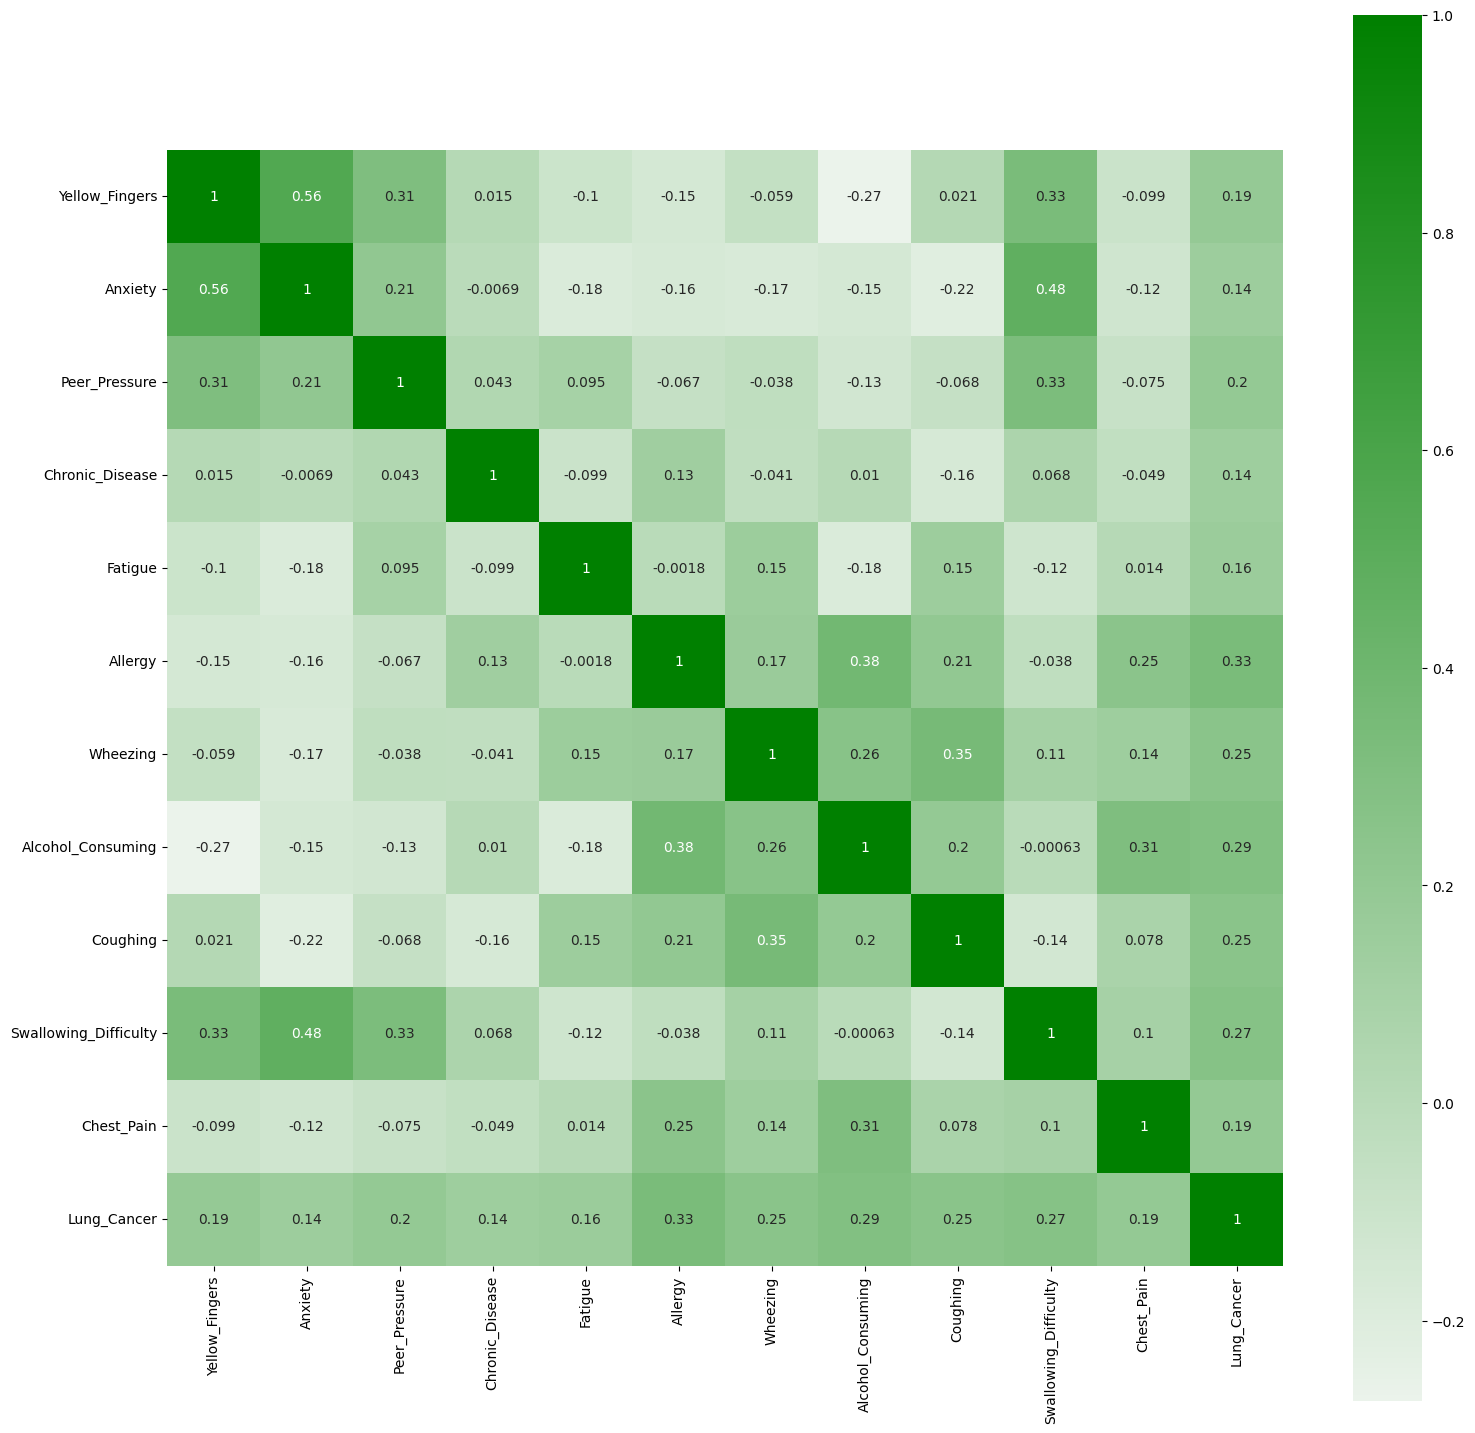

In [741]:
cmap=sns.light_palette("green", as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corr,cmap=cmap,annot=True, square=True)
plt.show()

### Data Preprocessing

#### Convert to numerical values using LabelEncoder

In [742]:
# Concert columns to numerical values using LabelEncoder from sklearn
le = LabelEncoder()
df1['Yellow_Fingers'] = le.fit_transform(df1['Yellow_Fingers'])
df1['Anxiety'] = le.fit_transform(df1['Anxiety'])
df1['Peer_Pressure'] = le.fit_transform(df1['Peer_Pressure'])
df1['Chronic_Disease'] = le.fit_transform(df1['Chronic_Disease'])
df1['Fatigue'] = le.fit_transform(df1['Fatigue'])
df1['Allergy'] = le.fit_transform(df1['Allergy'])
df1['Wheezing'] = le.fit_transform(df1['Wheezing'])
df1['Alcohol_Consuming'] = le.fit_transform(df1['Alcohol_Consuming'])
df1['Coughing'] = le.fit_transform(df1['Coughing'])
df1['Swallowing_Difficulty'] = le.fit_transform(df1['Swallowing_Difficulty'])
df1['Chest_Pain'] = le.fit_transform(df1['Chest_Pain'])
df1['Lung_Cancer'] = le.fit_transform(df1['Lung_Cancer'])

In [743]:
df1

,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic_Disease,Fatigue,Allergy,Wheezing,Alcohol_Consuming,Coughing,Swallowing_Difficulty,Chest_Pain,Lung_Cancer
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1
280,0,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0
282,1,1,0,0,0,0,0,0,0,1,1,0


In [744]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Yellow_Fingers         276 non-null    int64
 1   Anxiety                276 non-null    int64
 2   Peer_Pressure          276 non-null    int64
 3   Chronic_Disease        276 non-null    int64
 4   Fatigue                276 non-null    int64
 5   Allergy                276 non-null    int64
 6   Wheezing               276 non-null    int64
 7   Alcohol_Consuming      276 non-null    int64
 8   Coughing               276 non-null    int64
 9   Swallowing_Difficulty  276 non-null    int64
 10  Chest_Pain             276 non-null    int64
 11  Lung_Cancer            276 non-null    int64
dtypes: int64(12)
memory usage: 28.0 KB


#### Feature Engineering

<Axes: >

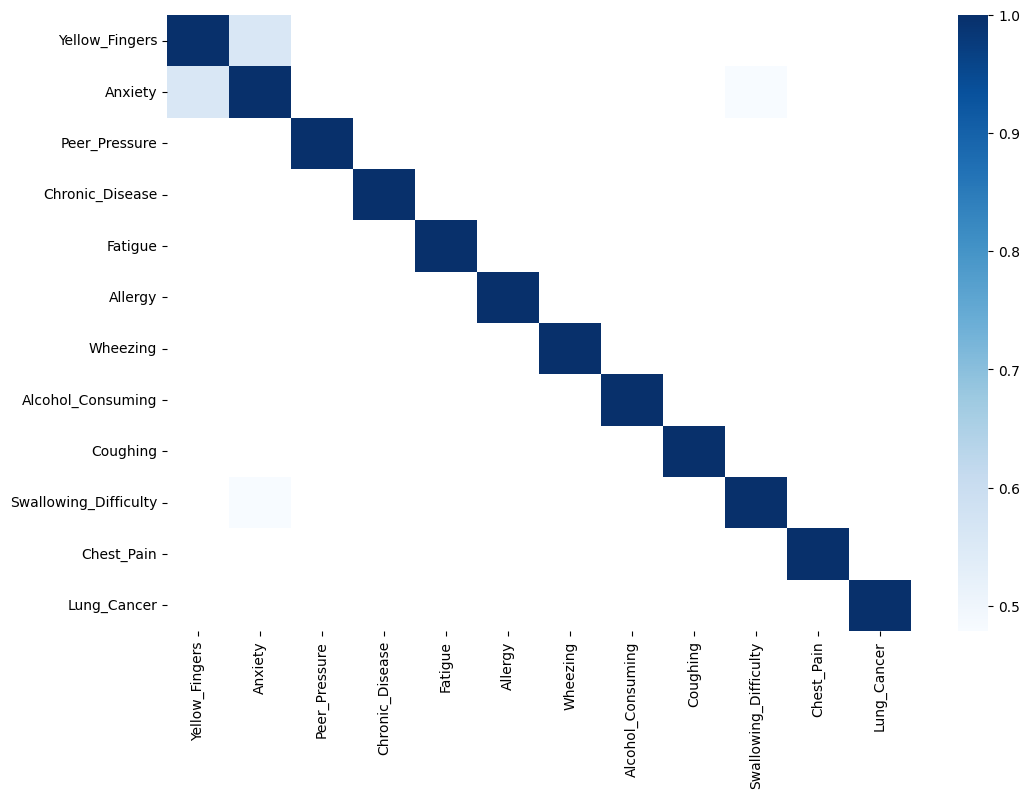

In [745]:
kot = corr[corr>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

In [746]:
df1['Scale'] = df1['Anxiety']*df1['Yellow_Fingers']

In [747]:
X = df1.drop(columns=['Lung_Cancer'], axis=1)
y = df1['Lung_Cancer']

In [748]:
# Use Method ADASYN for handling Imbalanced Data
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

In [749]:
len(X_resampled)

471

### Split Training set and Test set

In [750]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Feature Scaling

In [751]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Traning the KNN model on the Traning set

In [752]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Predicting the Test set results

In [753]:
y_knn_pred = classifier.predict(X_test)
print(y_knn_pred)

[1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0
 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0]


### Accuracy score and Confusion Matrix

In [754]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_knn_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9789473684210527


Confusion Matrix:
[[49  0]
 [ 2 44]]


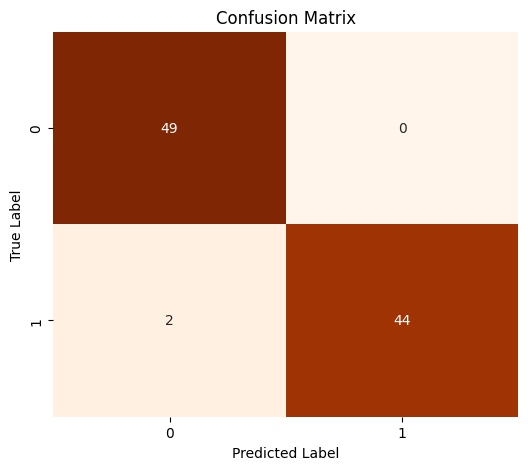

In [755]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_knn_pred)
print('Confusion Matrix:')
print(conf_matrix)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [756]:
class_report = classification_report(y_test, y_knn_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       1.00      0.96      0.98        46

    accuracy                           0.98        95
   macro avg       0.98      0.98      0.98        95
weighted avg       0.98      0.98      0.98        95



### Artificial Neural Network

In [757]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassier model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [758]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [759]:
y_ann_pred = mlp.predict(X_test)
print(y_ann_pred)

[1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0
 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0]


### Accuracy score and Confusion Matrix

In [760]:
accuracy = accuracy_score(y_test, y_ann_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.968421052631579


Confusion Matrix:
[[49  0]
 [ 3 43]]


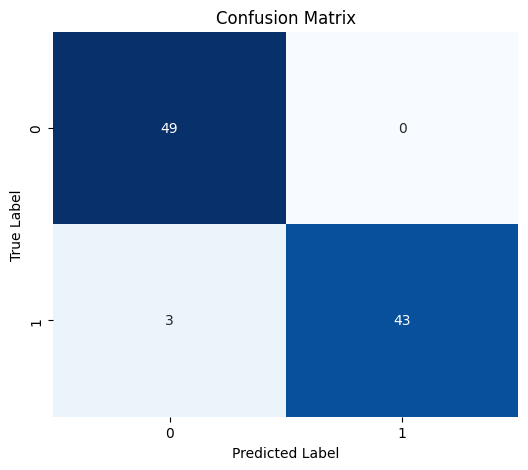

In [761]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_ann_pred)
class_report = classification_report(y_test, y_ann_pred)
print('Confusion Matrix:')
print(conf_matrix)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [762]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        49
           1       1.00      0.93      0.97        46

    accuracy                           0.97        95
   macro avg       0.97      0.97      0.97        95
weighted avg       0.97      0.97      0.97        95



In [763]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_nb_pred = gnb.predict(X_test)
print(y_nb_pred)

[1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0]


In [764]:
accuracy = accuracy_score(y_test, y_nb_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9263157894736842
